In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from datetime import datetime,timedelta
%matplotlib inline

### Gathering data for WeRateDogs Dataset 

I will gather the data from three different sources :

1- The WeRateDogs Twitter archive , it is alreday uploded in this workspace
2- The tweet image predictions by downloading the file ( image_predictions.tsv )
3- Importing data from twitter API

###  Importing data from WeRateDogs Twitter archive 

In [2]:
# Read the data from CSV file
df_Twitter_archieve = pd.read_csv('twitter-archive-enhanced1.csv')

In [3]:
# Present the first 5 rows of my dataset
df_Twitter_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Downloading data from required URL 

In [4]:
# Downloading the image using 
URL_image = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL_image)
# open the file with binary mode
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
# Read tsv file as dataframe
df_tweet_image = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [5]:
df_tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Importing data from Twitter API

In [6]:
# Gather Twitter data
consumer_key = '***************************'
consumer_secret = '***************************'
access_token = '***************************'
access_secret = '**************************'
# Tweepy query variable , pass to OAuthHandler instanceconsumer token and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth,
                wait_on_rate_limit=True, 
                wait_on_rate_limit_notify=True)
#test authentication
api

In [7]:
# create two list : one for correct API and the other for wrong API
List_of_twitter_IDs =[]
error_IDs=[]
# Check the path of file and write JASON to text file
if not os.path.exists('tweet-json.txt'):
    with open('tweet-json.txt', 'a', encoding='UTF-8') as f:
        for tweet_ID in List_of_twitter_IDs:
            try:
                # Get the  tweet status with extended mode to returns additional object 
                tweet_API = api.get_status(tweet_ID, tweet_mode='extended')._json
                json.dump(tweet_API , f)
                file.write('\n')
            except:
                # add and append error twitter id in error IDs list
                print(tweet_ID, "Error Founded : ")
                error_IDs.append(List_of_twitter_IDs)

In [8]:
# Read the test line by line 
data = []
with open('tweet-json.txt') as f:
    for line in f:
        try:
            tweet = json.loads(line)
            data.append(tweet)
        except:
            continue
# Store the dataframe in df_API         
df_Twitter_API = pd.DataFrame(data , columns=list(data[0].keys()))
# Check the first five rows
df_Twitter_API.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [9]:
df_Twitter_API.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [10]:
# Read pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count
df_required_field = df_Twitter_API[['id', 'retweet_count', 'favorite_count']]
# Display the five rows
df_required_field.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing data for WeRateDogs Dataset 

I will detect and document at least eight (8) quality issues and two (2) tidiness issues.

I will start with visual assessment with quality and tidness issues , then i will go with programmtic assessment to discover more issues ,I couldn't notice it visually.

### Visual Assessment

I already open the CSV files to check the data , I will exclude the columns that are not necassary in twitter archieve such as : source ,source,axpanded URLs ,doggo ,floofer ,pupper, puppo and text. In twitter API data set change column name from ID to twitter_ID to match the other data set. In Twitter Archieve dataframe i notice that in name column , there are many wrong names such as : the , such , my , O , not ,just , by ...etc with NON value , because it is impossible name is these values.
For Tweet image dataframe I will replace "_" with space.

### Programatic Assessment

I will use .Info() to display concise summary of dataframe , display non values .Also, .dtypes to return the datatype of each columns.

In [11]:
df_Twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

It is clear from above that  retweet columns need to be exculded

In [12]:
df_Twitter_archieve.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

timestamp should be datetime datatype ,and tweet_id should be string not int 

In [13]:
df_tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_tweet_image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Change the datatype of tweet_id into string insted of int

In [15]:
df_Twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

Change Id into twitter_ID to match other datset and ofcourse change the type into String , at the same time i will exclude unwanted columns

### Summary of Assessment 

#### Quallity Issues(Dirty) - content issue :

1- In df_Twitter_archieve dataframe, update wrong names
2- In df_Twitter_archieve dataframe , change missing value in name from 'None' to 'NaN' 
3- In df_Twitter_archieve dataframe , remove tweet that already retweet
4- In df_Twitter_archieve dataframe , remove tweet with no images
5- In df_tweet_image dataframe,  replace "_" with space
6- In df_tweet_image dataframe , capital the first letter in p1 column
7- In df_tweet_image dataframe , capital the first letter in p2 column
8- In df_tweet_image dataframe , capital the first letter in p3 column
9- In df_Twitter_API dataframe , change the id name into Tweet_ID to match other datframes
10- In df_Twitter_API dataframe , remove unnecessary columns for analysis

#### Tidness Issues(Messy data) - structure issue :

1- Change timestamp data type into datetime type
2- Join and combine all three datsets


### Cleaning data for WeRateDogs Dataset

#### I will start with quality issues then tidness issues , the process of data cleaning are : define , code then test before that i will take a copy of dataframes.

In [16]:
# Copy of three dataframes
df_Twitter_archieve_Clean = df_Twitter_archieve.copy()
df_tweet_image_Clean =df_tweet_image.copy()
df_Twitter_API_Clean1 = df_Twitter_API.copy()

### Quallity Issues

#### 1- Define : update wrong names such : all, the ,this , very , light ,life, my , a, an , such , quite and O wih None

#### Code

In [17]:
Fault_Names =['all' ,'a','an','the','this','light','such',"my",'O','not','one','very','mad','by','just','life' ,'old', 'quite','his','actually','incredibly','getting','infuriating','space','unacceptable','officially']
for name in Fault_Names:
    df_Twitter_archieve_Clean['name'].replace(name,'None', inplace=True)

#### Test

In [18]:
df_Twitter_archieve_Clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
1616           Alfie
661            Alfie
367            Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
280          Winston
559          Winston
407          Winston
986          Winston
1243         Winston
816          Winston
2133         Winston
171          Winston
1829         Winston
877           Wishes
410            Wyatt
1451           Wyatt
174            Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409         

#### 2- Define : change missing value in name from 'None' to 'NaN' 

#### Code

In [19]:
df_Twitter_archieve_Clean['name'] = df_Twitter_archieve_Clean['name'].replace('None', np.NaN) 

#### Test

In [20]:
df_Twitter_archieve_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1501 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 3- Define : remove tweet that already retweet (retweeted_status_id')

#### Code

In [21]:
# Remove thw tweet that already retweet
df_Twitter_archieve_Clean[df_Twitter_archieve_Clean['retweeted_status_id'].notnull()==True]
df_Twitter_archieve_Clean.drop(df_Twitter_archieve_Clean[df_Twitter_archieve_Clean['retweeted_status_id'].notnull()== True].index,inplace=True)

#### Test

In [22]:
df_Twitter_archieve_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1390 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 4- Define: remove tweet with no images

#### Code

In [23]:
df_Twitter_archieve_Clean = df_Twitter_archieve_Clean.dropna(subset=['expanded_urls'])

#### Test

In [24]:
sum(df_Twitter_archieve_Clean['expanded_urls'].isnull())

0

#### 5- Define: replace "_" with space in p1,p2 and p3 columns

#### Code

In [25]:
df_tweet_image_Clean['p1']=df_tweet_image_Clean['p1'].str.replace('_', ' ')
df_tweet_image_Clean['p2']=df_tweet_image_Clean['p2'].str.replace('_', ' ')
df_tweet_image_Clean['p3']=df_tweet_image_Clean['p3'].str.replace('_', ' ')

#### Test

In [26]:
df_tweet_image_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 6- Define: capital the first letter in p1 column

#### Code

In [27]:
df_tweet_image_Clean['p1']=df_tweet_image_Clean['p1'].str.title()

#### Test

In [28]:
df_tweet_image_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 7- Define: capital the first letter in p2 column

#### Code

In [29]:
df_tweet_image_Clean['p2']=df_tweet_image_Clean['p2'].str.title()

#### Test

In [30]:
df_tweet_image_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 8- Define: capital the first letter in p3 column

#### Code

In [31]:
df_tweet_image_Clean['p3']=df_tweet_image_Clean['p3'].str.title()

#### Test

In [32]:
df_tweet_image_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 9- Define: change the id name into Tweet_ID to match other datframes

#### Code

In [33]:
df_Twitter_API_Clean1.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [34]:
df_Twitter_API_Clean1.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [35]:
df_Twitter_API_Clean1.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

#### 10 - Define:remove unnecessary columns for analysis : possibly_sensitive ,quoted_status_id_str,lang...etc as listed ib below list

#### Code

In [36]:
deleted_clolumns = ['lang','user','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status', 'place','possibly_sensitive','possibly_sensitive_appealable', 'source','truncated','contributors','coordinates','display_text_range', 'entities', 'extended_entities', 'favorited','retweeted']
df_Twitter_API_Clean1 =df_Twitter_API_Clean1.drop(deleted_clolumns,axis =1)

#### Test

In [37]:
df_Twitter_API_Clean1.columns

Index(['created_at', 'tweet_id', 'full_text', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [38]:
# reorder the columns as below
Columns_Order = ['tweet_id', 'full_text', 'retweet_count',
       'favorite_count','created_at']
df_Twitter_API_Clean1 = df_Twitter_API_Clean1.reindex(columns=Columns_Order)

### Tidness Issues

#### 1- Define:Change timestamp data type into datetime type

#### Code

In [39]:
df_Twitter_archieve_Clean['timestamp']=pd.to_datetime(df_Twitter_archieve_Clean['timestamp'])
# I will split date from time , each in separate column
df_Twitter_archieve_Clean['date']= df_Twitter_archieve_Clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_Twitter_archieve_Clean['time']= df_Twitter_archieve_Clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [40]:
df_Twitter_archieve_Clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00


#### 2- Define: Join and combine all three datsets

#### Code - I will remove unnecassary columns from df_Twitter_archieve_Clean and combine dog stages into one stage

In [41]:
df_Twitter_archieve_Clean['stage'] = df_Twitter_archieve[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
# I will replace strange words such : NoneNoneNoneNone ...etc
df_Twitter_archieve_Clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_Twitter_archieve_Clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_Twitter_archieve_Clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_Twitter_archieve_Clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)

#### Test

In [42]:
df_Twitter_archieve_Clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None


In [43]:
df_Twitter_archieve_Clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

#### Test

In [44]:
df_Twitter_archieve_Clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [45]:
df_Twitter_archieve_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2117 non-null int64
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1390 non-null object
date                  2117 non-null object
time                  2117 non-null object
stage                 2117 non-null object
dtypes: int64(3), object(4)
memory usage: 132.3+ KB


As clear from above ,I need to change tweet_id type into string and dat, time into datetime type

In [46]:
df_Twitter_archieve_Clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [47]:
df_Twitter_archieve_Clean.tweet_id = df_Twitter_archieve_Clean.tweet_id.astype(str)
df_Twitter_archieve_Clean['date'] = pd.to_datetime(df_Twitter_archieve_Clean['date'])
df_Twitter_archieve_Clean['time'] = pd.to_datetime(df_Twitter_archieve_Clean['time'])

#### Test

In [48]:
df_Twitter_archieve_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1390 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null datetime64[ns]
stage                 2117 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 132.3+ KB


In [49]:
df_tweet_image_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id is the key in all dataset , it should be same type as i changed the type of df_Twitter_archieve_Clean dataset into String , ishould do the same for other two datsets

In [50]:
df_tweet_image_Clean.tweet_id = df_tweet_image_Clean.tweet_id.astype(str)

#### Test

In [51]:
df_tweet_image_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [52]:
df_Twitter_API_Clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [53]:
df_Twitter_API_Clean1.tweet_id = df_Twitter_API_Clean1.tweet_id.astype(str)

#### Test

In [54]:
df_Twitter_API_Clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null object
full_text         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


In [55]:
df_Merge1 = pd.merge(df_Twitter_archieve_Clean,df_Twitter_API_Clean1,on='tweet_id', how='inner')

In [56]:
df_combine = pd.merge(df_Merge1,df_tweet_image_Clean ,on='tweet_id', how='inner')

#### Test

In [57]:
df_combine.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,2017-08-01,2019-02-03 16:23:00,None,This is Phineas. He's a mystical boy. Only eve...,8853,39467,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,13,10,Tilly,2017-08-01,2019-02-03 00:17:00,None,This is Tilly. She's just checking pup on you....,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,12,10,Archie,2017-07-31,2019-02-03 00:18:00,None,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,13,10,Darla,2017-07-30,2019-02-03 15:58:00,None,This is Darla. She commenced a snooze mid meal...,8964,42908,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,12,10,Franklin,2017-07-29,2019-02-03 16:00:00,None,This is Franklin. He would like you to stop ca...,9774,41048,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


####  Define : as clear from above date and time need to be fixed

#### Code

In [58]:
df_combine['date'] = df_combine['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_combine['time'] = df_combine['time'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [59]:
df_combine.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None,This is Phineas. He's a mystical boy. Only eve...,8853,39467,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None,This is Tilly. She's just checking pup on you....,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None,This is Darla. She commenced a snooze mid meal...,8964,42908,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None,This is Franklin. He would like you to stop ca...,9774,41048,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


## Storing, Analyzing, and Visualizing Data for WeRateDogs Dataset

### Storing WeRateDogs Dataset

In [60]:
df_combine.to_csv('twitter_archive_master.csv')

#### I will save also the other datframes

In [61]:
#  I will save also the other datframes
df_Twitter_archieve_Clean.to_csv('df_Twitter_archieve_Clean.csv')
df_Twitter_API_Clean1.to_csv('df_Twitter_API_Clean1.csv')
df_tweet_image_Clean.to_csv('df_tweet_image_Clean.csv')

### Analyzing WeRateDogs Dataset

In [62]:
df_twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [63]:
df_twitter_archive_master.head()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None,This is Phineas. He's a mystical boy. Only eve...,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None,This is Tilly. She's just checking pup on you....,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,12,10,Archie,07-31-2017,00:18,None,This is Archie. He is a rare Norwegian Pouncin...,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,13,10,Darla,07-30-2017,15:58,None,This is Darla. She commenced a snooze mid meal...,8964,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None,This is Franklin. He would like you to stop ca...,9774,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [64]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 23 columns):
Unnamed: 0            1994 non-null int64
tweet_id              1994 non-null int64
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1349 non-null object
date                  1994 non-null object
time                  1994 non-null object
stage                 1994 non-null object
full_text             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
created_at            1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object

It is clear from above that we need to remove Unnamed: 0  column and change dattype of tweet_id into String

#### Code

In [65]:
df_twitter_archive_master.drop(['Unnamed: 0'],axis=1,inplace=True)

In [66]:
df_twitter_archive_master.tweet_id = df_twitter_archive_master.tweet_id.astype(str)

#### Test

In [67]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1349 non-null object
date                  1994 non-null object
time                  1994 non-null object
stage                 1994 non-null object
full_text             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
created_at            1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null floa

### Insights WeRateDogs Dataset

In [68]:
df_twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.280843,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,41.497718,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


Three Observations :
1- It is clear that rating dog numerator has huge outier 1776 and also the rating dog denoiminator
2- The mean for retweet_count is 2766 , and high  retweet_count around 79515.
3- The mean for favorite_count is 8895 , and high favorite dog around 132810.

#### 1- Define : in fact , I need to know more about who has the highest favorite dog and comapre it with retweet_count , if the tweet is the same or not

#### Code

In [69]:
df_twitter_archive_master[df_twitter_archive_master["favorite_count"]== 132810]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,13,10,NaN,01-21-2017,18:26,puppo,Here's a super supportive puppo participating ...,48265,132810,...,1,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True


In [70]:
df_twitter_archive_master[df_twitter_archive_master["retweet_count"]== 79515]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,13,10,NaN,06-18-2016,18:26,doggo,Here's a doggo realizing you can stand in a po...,79515,131075,...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True


#### Observation

It is clear that the tweet that has been favortie it is not most retweeted .

####  2- Define : let's expolore more about which tweet has most top tweet dog rating

#### Code

In [71]:
High_rating = df_twitter_archive_master['rating_numerator']
i = Counter(High_rating)
i.most_common()

[(12, 450),
 (10, 419),
 (11, 396),
 (13, 261),
 (9, 151),
 (8, 95),
 (7, 52),
 (14, 35),
 (5, 33),
 (6, 32),
 (3, 19),
 (4, 16),
 (2, 9),
 (1, 5),
 (0, 2),
 (84, 1),
 (24, 1),
 (75, 1),
 (27, 1),
 (165, 1),
 (1776, 1),
 (204, 1),
 (50, 1),
 (99, 1),
 (80, 1),
 (45, 1),
 (60, 1),
 (44, 1),
 (143, 1),
 (121, 1),
 (26, 1),
 (144, 1),
 (88, 1),
 (420, 1)]

#### Observation

It is clear that from above that the most is 12 with 450 instances

####  3- Define : I need to knwo which tweet has the maximum outlier 

In [72]:
df_twitter_archive_master[df_twitter_archive_master['rating_numerator']==1776]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,full_text,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
726,749981277374128128,1776,10,Atticus,07-04-2016,15:00,None,This is Atticus. He's quite simply America af....,2772,5569,...,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


#### Observation

It is clear that the dog who has the outlier is Atticus dog

### Visualizing WeRateDogs Dataset

I will expolore the relashion between retweet_count and favorite_count

In [73]:
timestamp= df_twitter_archive_master[['date', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [74]:
timestamp.set_index('date', inplace=True)

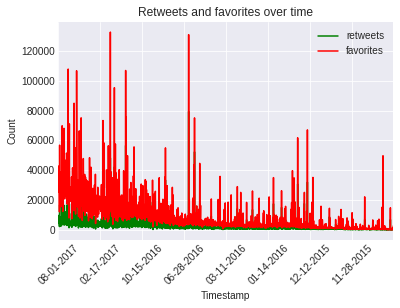

In [80]:
ax = timestamp['retweet_count'].plot(color = 'green', label='retweets')
timestamp['favorite_count'].plot(color = 'red', label='favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Timestamp')
plt.ylabel('Count')
#rotate tick labels on x axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Retweets and favorites over time')
plt.show()

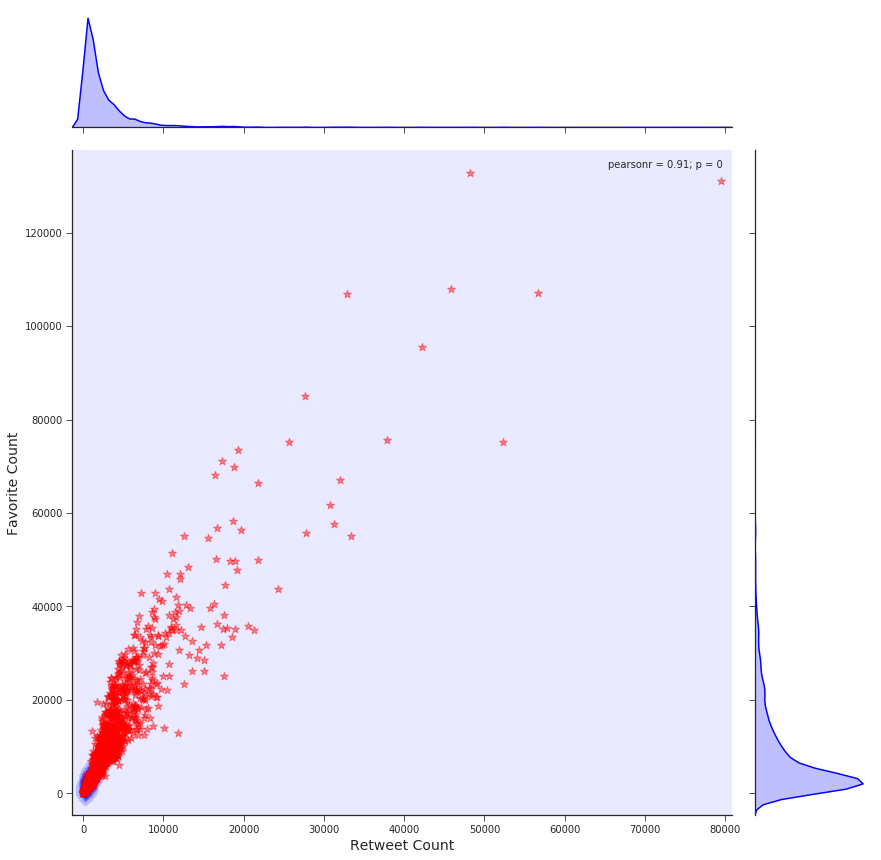

In [76]:
sns.set_style('ticks')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_twitter_archive_master, 
                  color="blue",
                  kind="kde", 
                  size=12)
g.plot_joint(plt.scatter,  
             c="red",
             s=70, 
             linewidth=1, 
             marker="*",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=14)

### References

1-https://stackoverflow.com/questions/15658187/replace-all-words-from-word-list-with-another-string-in-python
2-https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
3-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
4-https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots